In [4]:
train_DIR='train_folder'
validation_DIR='validation_folder'
test_DIR='test_folder'
train_res_DIR='train_results'
test_rese_DIR='test_results'

In [5]:
command2="python3 ../test.py \
--train_dataset \"{}\" \
--loaddirec \"{}\" \
--val_dataset \"{}\" \
--direc '{}' \
--batch_size 1 \
--modelname \"MedT\" \
--imgsize 128 \
--gray \"no\"".format(train_DIR,'train_results/390/MedT.pth',test_DIR,test_rese_DIR)
!{command2}

/home/passlab/.local/lib/python3.6/site-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [7]:
import os
N=328

st=0

Fsc=[]

MIU=[]

PA=[]

bestfsc=0

bestmiu=0
bestpa=0
bestep=0

folder='test_folder/labelcol'
listinfo=os.listdir(folder)
listinfo

['0005.png',
 '0012.png',
 '0014.png',
 '0011.png',
 '0006.png',
 '0003.png',
 '0013.png',
 '0007.png',
 '0001.png',
 '0008.png',
 '0002.png',
 '0004.png',
 '0010.png',
 '0009.png']

In [10]:
from sklearn.metrics import jaccard_score, f1_score
import numpy as np
from PIL import Image,ImageDraw

f1,iou=[],[]
for i in listinfo:
        I = np.array(Image.open('test_folder/labelcol/'+i))
        I=np.where(I>=127,1,0)

        
        L = np.array(Image.open('test_results/'+i))
        L=np.where(L>=127,1,0)
        y_true,y_pred = I.flatten(),L.flatten()
        f1.append(f1_score(y_true,y_pred))
        iou.append(jaccard_score(y_true,y_pred))

In [11]:
np.mean(f1),np.mean(iou)

(0.5698428411236857, 0.3997904214910938)

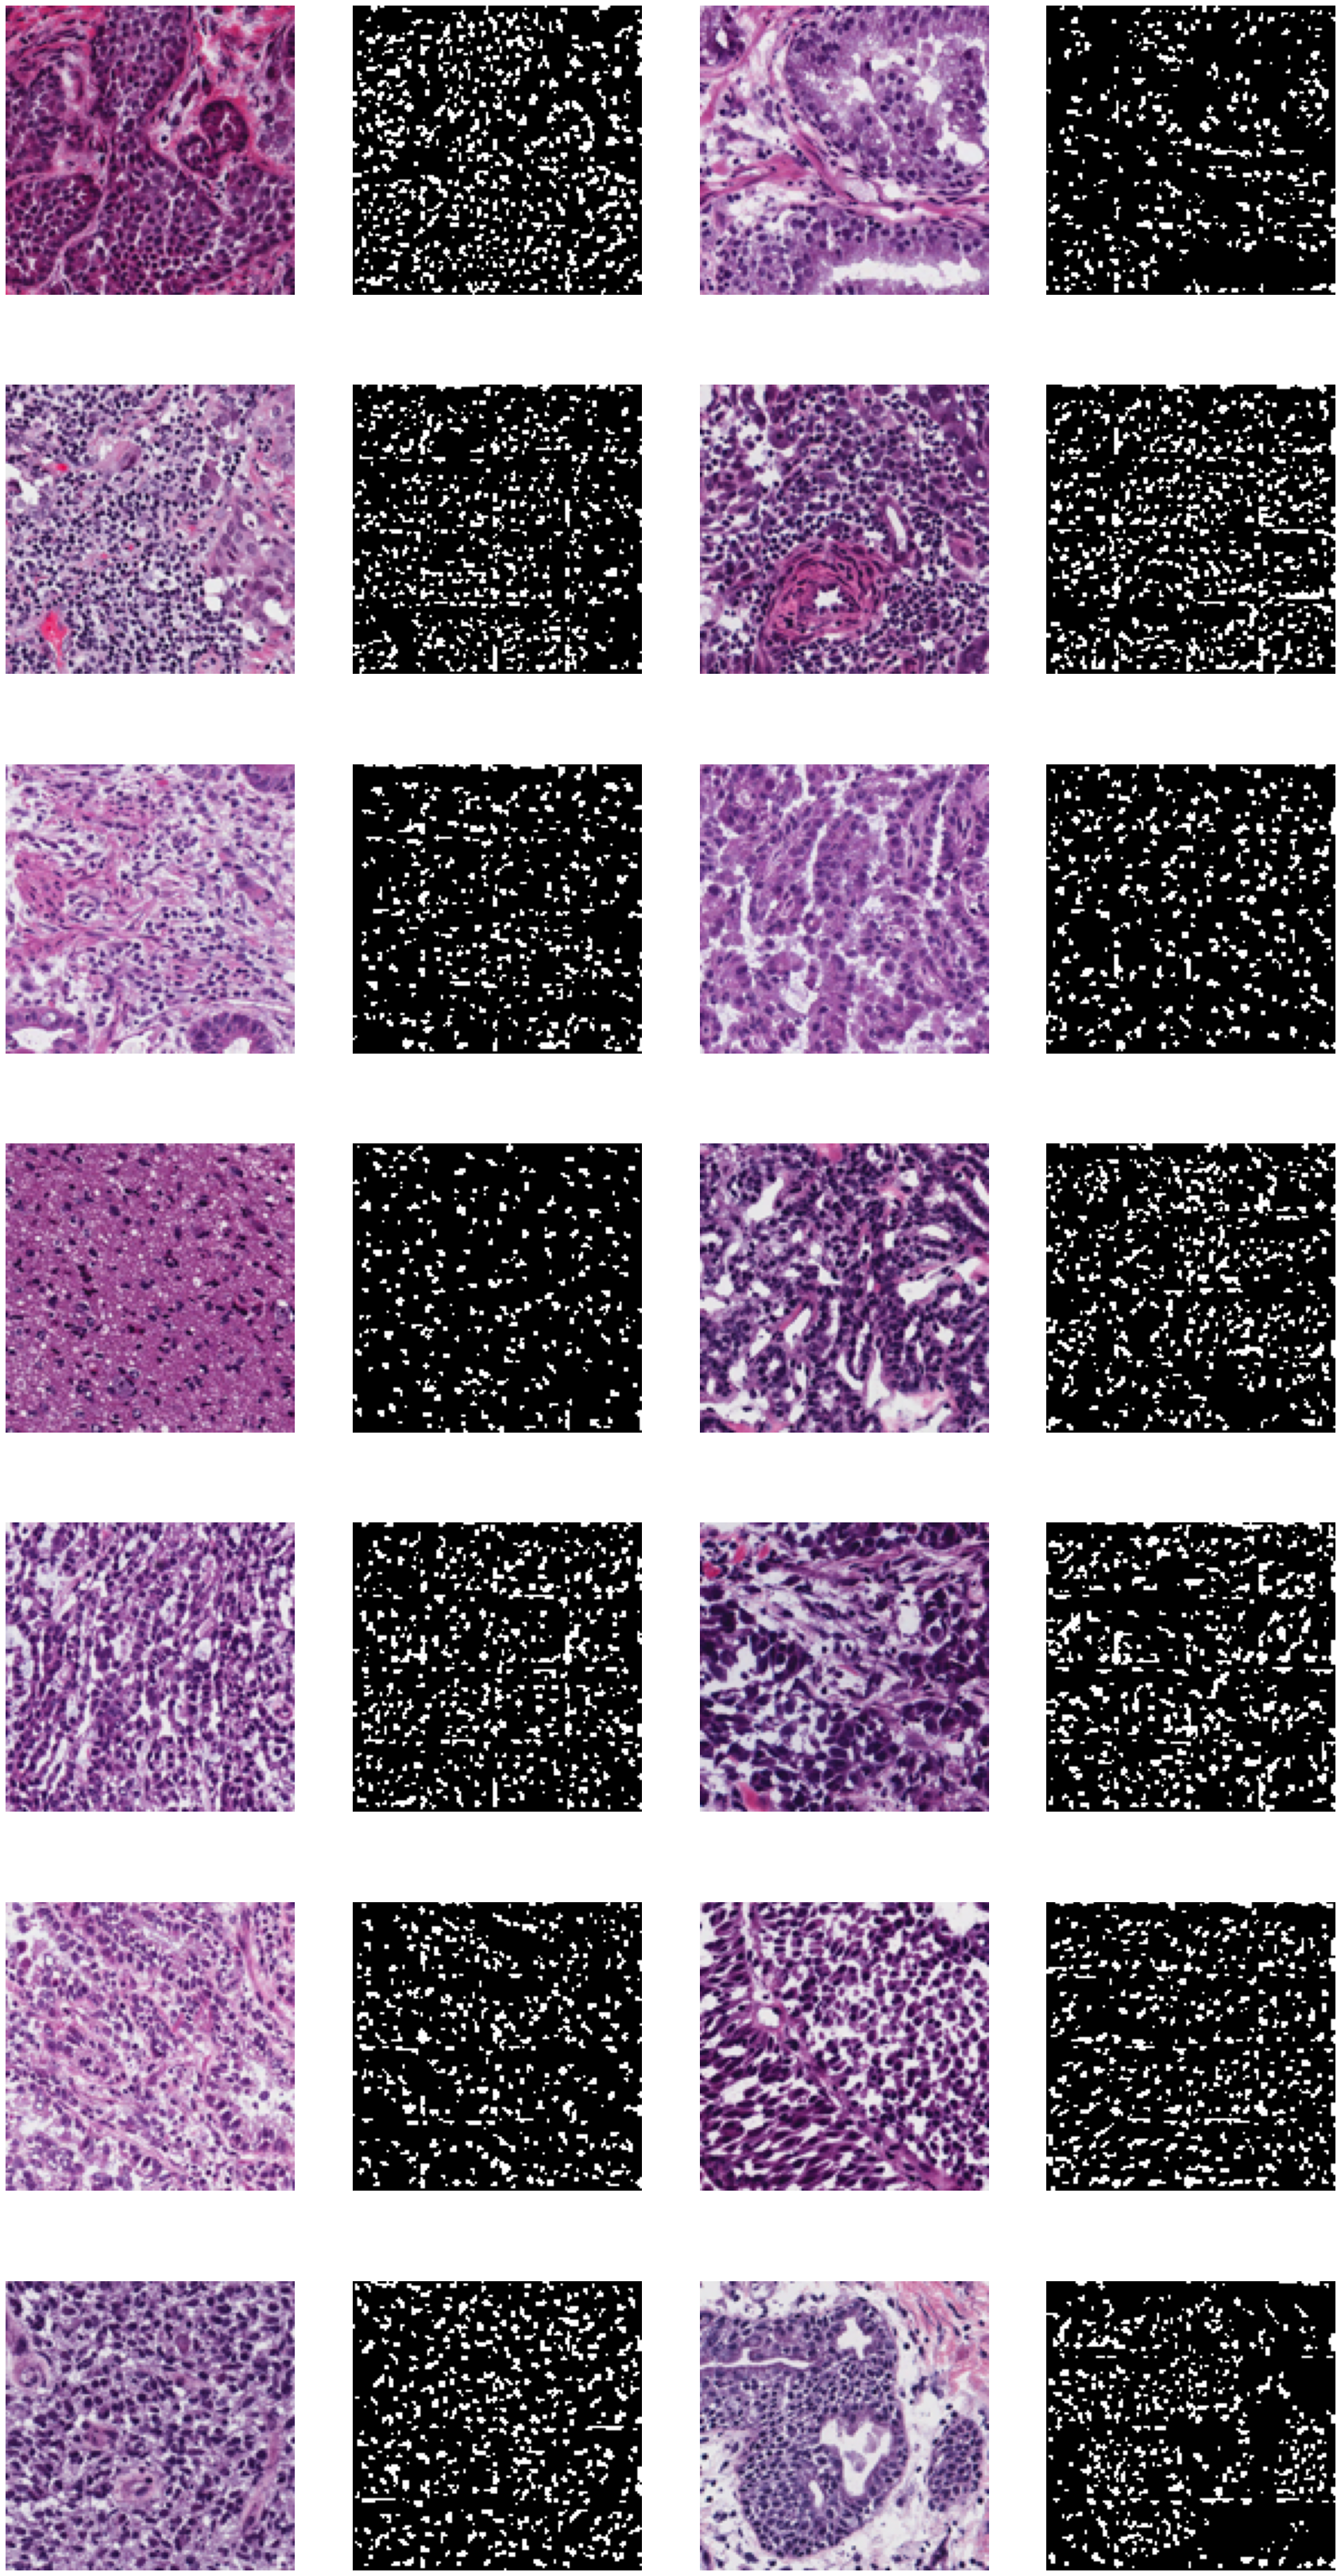

In [14]:
import matplotlib.pyplot as plt


count=0
fig, ax = plt.subplots(7,4,figsize=(30,60))

[axi.set_axis_off() for axi in ax.ravel()]
for index,k in enumerate(os.listdir('test_results')):
  
  i='test_folder/img/'+k
  j='test_results/'+k
  img=Image.open(i)
  label=Image.open(j)
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(img)
  count+=1
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(label,cmap='gray')
  count+=1
plt.savefig('test_results.png')